# Load the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# %matplotlib inline

- This is a special command used in Jupyter Notebook (or Google Colab).
- It tells Python: **“Show all plots inside this notebook — right below the code cell.”**

**When you use matplotlib to make graphs, like this:**

```
import matplotlib.pyplot as plt

plt.plot([1, 2, 3], [10, 20, 30])
plt.show()
```
In a normal Python script, the plot pops up in a new window.

But in Jupyter Notebook or Colab: If you write %matplotlib inline before your plotting code, the graph will appear directly under your code cell, not in a separate window.

In [2]:
# df = pd.read_csv('zomato.csv')

**The Error** 🇱'utf-8' codec can't decode byte 0xed in position 7044: invalid continuation byte

UTF-8 → is a text encoding system — it tells Python how to read bytes (raw data) as readable text (characters).

When you open a file (like .csv, .txt, etc.) in Python, it assumes by default that it’s encoded in UTF-8.

This error means:

Python tried to read the file as UTF-8 text,
but found a byte (0xED) that doesn’t belong in a valid UTF-8 sequence.

So — the file is not actually UTF-8 encoded.
It might be encoded in another format like Latin-1, ISO-8859-1, or cp1252.

**To fix: If you’re reading a CSV with pandas:**

```
import pandas as pd

df = pd.read_csv("data.csv", encoding="latin1")
```
You can also try:
```
df = pd.read_csv("data.csv", encoding="ISO-8859-1")
```

In [3]:
df = pd.read_csv('zomato.csv', encoding = 'latin-1')

In [4]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
df.describe()
# for int or float only

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


# In data analysis, we need to:
1. Find missing values
2. Explore about the numerical variables
3. Explore about categorical variables
4. Finding relationship between features

In [8]:
df.isnull().sum()

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


"Cuisines" has 9 null values

In [9]:
# Other way we can find out the column having null values is

[features for features in df.columns if df[features].isnull().sum()>0]

['Cuisines']

In [10]:
df.shape

(9551, 21)

<Axes: >

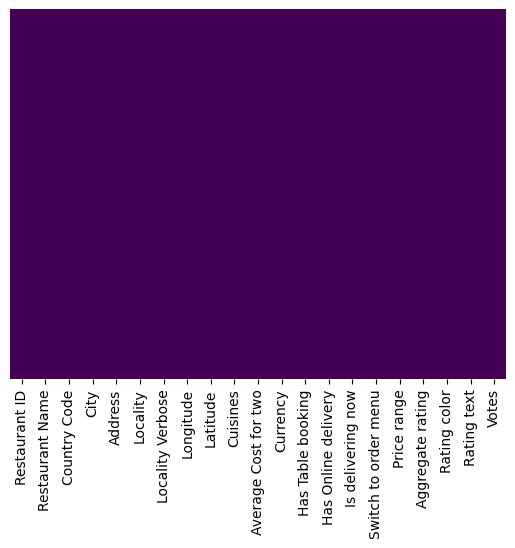

In [11]:
# Heatmap to see correlation of different variables
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Not visible in the above heatmap because 9551 rows and 9 null values

In [12]:
df_country = pd.read_excel('Country-Code.xlsx')
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [13]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

Country Code is in df as well

# Combining both the dataframes

In [14]:
pd.merge(df,df_country,on='Country Code',how='left')
# left because our focus is df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ÛÁstanbul,"Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...",Karakí_y,"Karakí_y, ÛÁstanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz AÛôacÛ±,208,ÛÁstanbul,"Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...",Koôuyolu,"Koôuyolu, ÛÁstanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aôôk Kahve,208,ÛÁstanbul,"Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...",Kuruí_eôme,"Kuruí_eôme, ÛÁstanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


Country is also added in df as the last column

In [15]:
final_df = pd.merge(df,df_country,on='Country Code',how='left')

# To check data types

In [16]:
final_df.dtypes

,0
Restaurant ID,int64
Restaurant Name,object
Country Code,int64
City,object
Address,object
Locality,object
Locality Verbose,object
Longitude,float64
Latitude,float64
Cuisines,object


In [17]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [18]:
final_df.Country.value_counts()

,count
Country,
India,8652
United States,434
United Kingdom,80
Brazil,60
South Africa,60
UAE,60
New Zealand,40
Turkey,34
Australia,24


It is pretty evident, Zomato is mostly used in India with the data given to us.

In [19]:
final_df.Country.value_counts().index

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'South Africa',
       'UAE', 'New Zealand', 'Turkey', 'Australia', 'Phillipines', 'Indonesia',
       'Qatar', 'Singapore', 'Sri Lanka', 'Canada'],
      dtype='object', name='Country')

In [20]:
country_names = final_df.Country.value_counts().index

In [21]:
final_df.Country.value_counts().values

array([8652,  434,   80,   60,   60,   60,   40,   34,   24,   22,   21,
         20,   20,   20,    4])

In [22]:
country_val = final_df.Country.value_counts().values

# Create Pie Chart

([<matplotlib.patches.Wedge at 0x7b38313bf770>,
 [Text(-1.082974277862112, 0.1927867046480056, 'India'),
  Text(1.0772816964394372, -0.22240536530526556, 'United States'),
  Text(1.0995865232164619, -0.030157552300104404, 'United Kingdom')],
 [Text(-0.5907132424702428, 0.10515638435345759, '94.39%'),
  Text(0.5876081980578747, -0.12131201743923574, '4.73%'),
  Text(0.5997744672089791, -0.01644957398187513, '0.87%')])

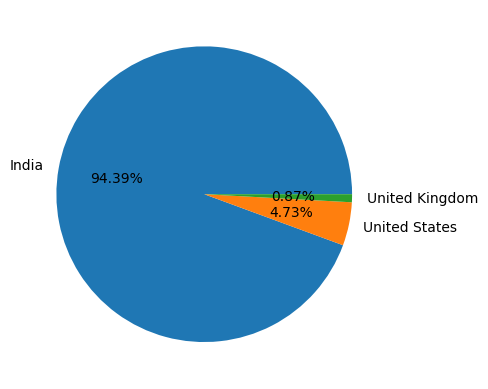

In [32]:
plt.pie(country_val[:3],labels=country_names[:3],autopct='%1.2f%%')

# plt.pie(x-axis, labels, percentage) -> Top three countries

Observation: Zomato max records from India followed by US and UK.

In [33]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [34]:
final_df.groupby(['Aggregate rating','Rating color','Rating text'])

In [35]:
final_df.groupby(['Aggregate rating','Rating color','Rating text']).size()

,,,0
Aggregate rating,Rating color,Rating text,
0.0,White,Not rated,2148
1.8,Red,Poor,1
1.9,Red,Poor,2
2.0,Red,Poor,7
2.1,Red,Poor,15
2.2,Red,Poor,27
2.3,Red,Poor,47
2.4,Red,Poor,87
2.5,Orange,Average,110


In [36]:
final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index()

,Aggregate rating,Rating color,Rating text,0
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [37]:
final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [38]:
ratings = final_df.groupby(['Aggregate rating','Rating color','Rating text']).size().reset_index().rename(columns={0:'Rating Count'})

Observation:
1. When rating is from 4.5 to 4.9 -> Excellent
2. When rating is from 4.0 to 4.4 -> Very Good
3. When rating is from 3.5 to 3.9 -> Good
4. When rating is from 2.5 to 3.4 -> Average
5. When rating is from 1.8 to 2.4 -> Poor
6. When rating is from 0 -> No ratings given

In [39]:
# How these ratings are related to these countries?

In [40]:
ratings.head()

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15


In [41]:
# Categorical and Numerical -> Barplot, boxplot, violinplot

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

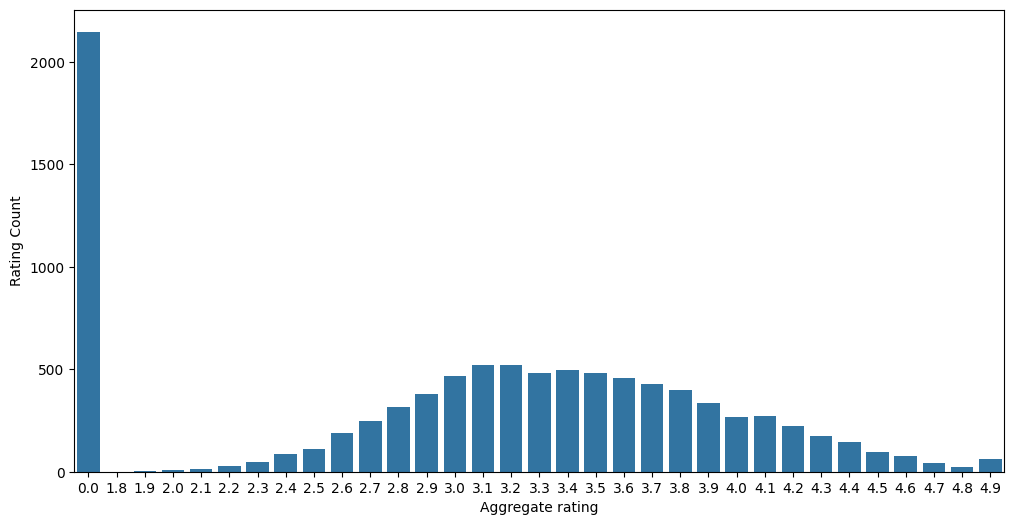

In [49]:
plt.rcParams['figure.figsize'] = (12,6)
sns.barplot(data = ratings, x = 'Aggregate rating', y = 'Rating Count')

<Axes: >

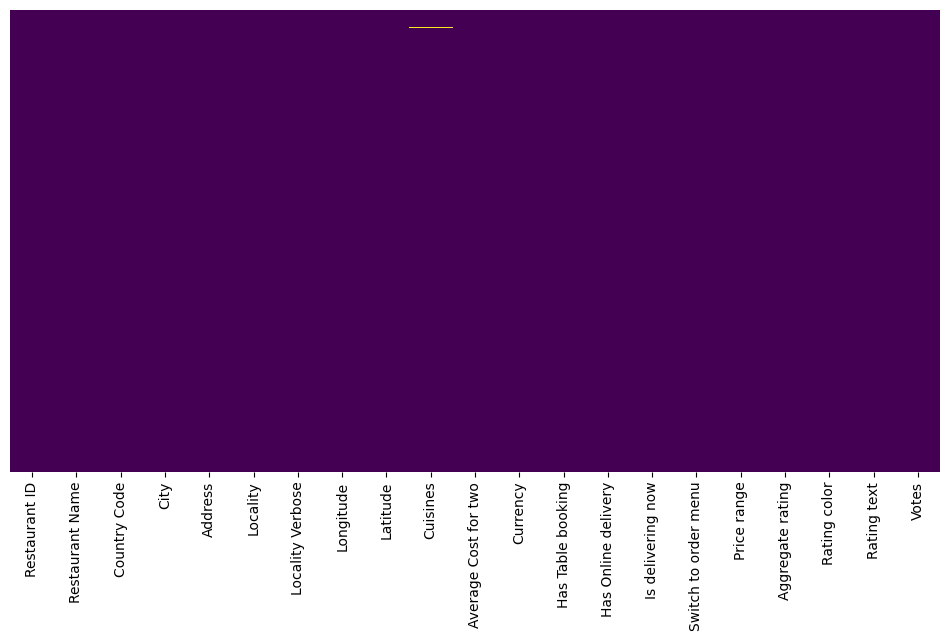

In [50]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Since we have changed the fig size that is why the missing value is visible now

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

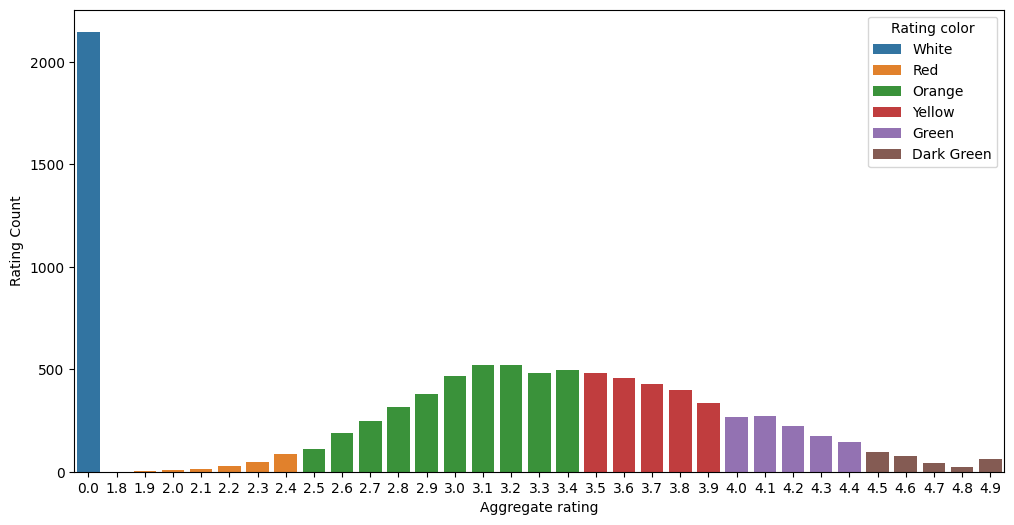

In [51]:
sns.barplot(data = ratings, x = 'Aggregate rating', y = 'Rating Count', hue = 'Rating color')

Colors not matching the text so we need to match them

<Axes: xlabel='Aggregate rating', ylabel='Rating Count'>

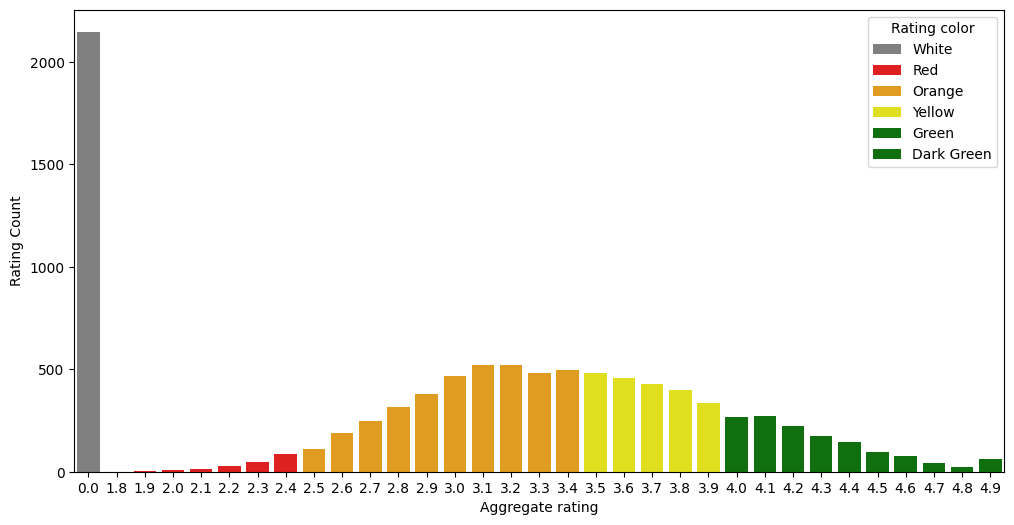

In [54]:
sns.barplot(data = ratings, x = 'Aggregate rating', y = 'Rating Count', hue = 'Rating color', palette = ['gray','red','orange','yellow','green','green'])

Observations:
1. Not Rated count is super high.
2. Max number of ratings are between 2.5 and 3.4.

If if we having missing ratings, we can take avg ofnumbers between 2.5 and 3.5 (inclusive) and handle the missing values.

To see the data on the basis of color: let's use count plot which is used for one categorical value

/tmp/ipython-input-558985701.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data = ratings, x = 'Rating color', palette = ['gray','red','orange','yellow','green','green'])


<Axes: xlabel='Rating color', ylabel='count'>

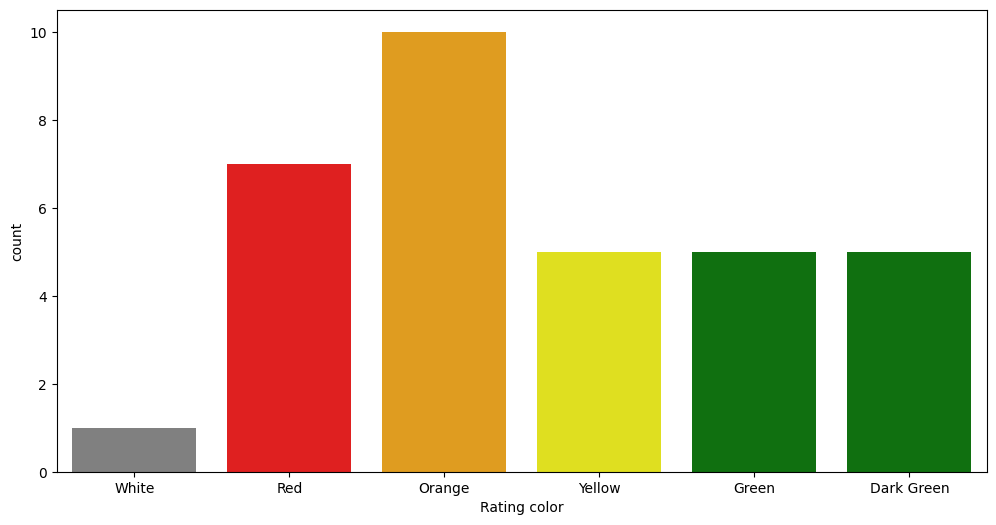

In [57]:
sns.countplot(data = ratings, x = 'Rating color', palette = ['gray','red','orange','yellow','green','green'])
# gives the frequency in ratings not count exactly don't confuse with label in y-axis

In [58]:
ratings

,Aggregate rating,Rating color,Rating text,Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [60]:
# Find the countries that has given zero rating.
  # Country names -> Categorical -> Country
  # Rating -> Number (Aggregate rating) or Categorical (Rating Color)
  # Can do comparison by using barplot, boxplot, violinplot, and striffplot for Country and Aggregate rating
  # Can do comparison by using countplot or heatmap for Country and Rating color

In [65]:
final_df[final_df['Rating color'] == 'White'].groupby('Country').size().reset_index().rename(columns={0:'No Rating'})

,Country,No Rating
0,Brazil,5
1,India,2139
2,United Kingdom,1
3,United States,3


Observations: 4 Countries have zero/no ratings.
- 1st -> India (2139)
- 2nd -> Brazil (5)
- 3rd -> US (3)
- 4th -> UK (1)

Total zero rating = 2148 and out of that India has 2139 zero rating.
Difference of 9

In [66]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [67]:
# Find which currency is used by which country
  # Currency and Country

In [75]:
final_df[['Country','Currency']].groupby(['Country','Currency']).size().reset_index().rename(columns={0:'Currency Count'})

,Country,Currency,Currency Count
0,Australia,Dollar($),24
1,Brazil,Brazilian Real(R$),60
2,Canada,Dollar($),4
3,India,Indian Rupees(Rs.),8652
4,Indonesia,Indonesian Rupiah(IDR),21
5,New Zealand,NewZealand($),40
6,Phillipines,Botswana Pula(P),22
7,Qatar,Qatari Rial(QR),20
8,Singapore,Dollar($),20
9,South Africa,Rand(R),60


In [76]:
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [77]:
# Which countries have online delivery options?

In [79]:
final_df[final_df['Has Online delivery']=='Yes'].Country.value_counts()

,count
Country,
India,2423
UAE,28


In [82]:
final_df[['Has Online delivery','Country']].groupby(['Has Online delivery','Country']).size().reset_index().rename(columns={0:'Online Delivery Count'})

,Has Online delivery,Country,Online Delivery Count
0,No,Australia,24
1,No,Brazil,60
2,No,Canada,4
3,No,India,6229
4,No,Indonesia,21
5,No,New Zealand,40
6,No,Phillipines,22
7,No,Qatar,20
8,No,Singapore,20
9,No,South Africa,60


Observations:
1. Online deliveries are available in India and UAE.
2. There are few places in India and UAE where online delivery is unavailable as well.

In [83]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [86]:
# Create a pie chart for top 5 cities distribution

In [87]:
final_df.City.value_counts().index

Index(['New Delhi', 'Gurgaon', 'Noida', 'Faridabad', 'Ghaziabad',
       'Bhubaneshwar', 'Lucknow', 'Ahmedabad', 'Amritsar', 'Guwahati',
       ...
       'Forrest', 'East Ballina', 'Huskisson', 'Inverloch', 'Lakeview',
       'Lakes Entrance', 'Mohali', 'Panchkula', 'Bandung', 'Randburg'],
      dtype='object', name='City', length=141)

In [88]:
city_values = final_df.City.value_counts().values
city_labels = final_df.City.value_counts().index

([<matplotlib.patches.Wedge at 0x7b3829604920>,
 [Text(-0.6145353730323401, 0.9123301350344637, 'New Delhi'),
  Text(0.06236774886414425, -1.0982305149200777, 'Gurgaon'),
  Text(0.878904221413572, -0.6614585169014024, 'Noida'),
  Text(1.0922218482114119, -0.1305811406354216, 'Faridabad'),
  Text(1.099946277419523, -0.010871374841004297, 'Ghaziabad')],
 [Text(-0.33520111256309454, 0.4976346191097074, '68.87%'),
  Text(0.03401877210771504, -0.5990348263200423, '14.07%'),
  Text(0.479402302589221, -0.36079555467349217, '13.59%'),
  Text(0.5957573717516791, -0.07122607671022996, '3.16%'),
  Text(0.5999706967742853, -0.00592984082236598, '0.31%')])

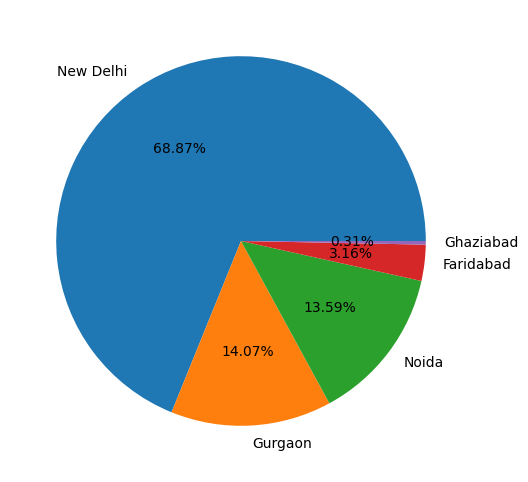

In [90]:
plt.pie(city_values[:5], labels = city_labels[:5], autopct='%1.2f%%')

In [91]:
# Find the top 10 cuisines

In [96]:
final_df.Cuisines.value_counts()

,count
Cuisines,
North Indian,936
"North Indian, Chinese",511
Chinese,354
Fast Food,354
"North Indian, Mughlai",334
...,...
"World Cuisine, Patisserie, Cafe",1
"Burger, Izgara",1
"Desserts, Bí_rek",1


In [97]:
final_df.Cuisines.value_counts().head(10)
# top 10

,count
Cuisines,
North Indian,936
"North Indian, Chinese",511
Chinese,354
Fast Food,354
"North Indian, Mughlai",334
Cafe,299
Bakery,218
"North Indian, Mughlai, Chinese",197
"Bakery, Desserts",170
